In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
from pomegranate import *
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('data/YCB.csv', header=0, sep=',')
print list(data)


['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']


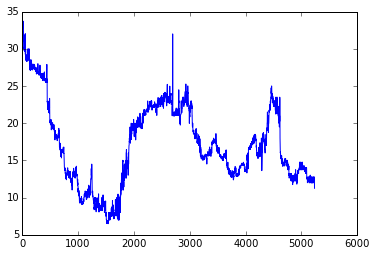

In [25]:
plt.plot(data["Open"])

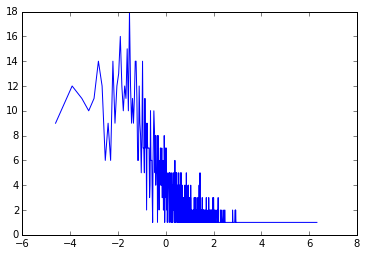

In [5]:
data_open = data.Open
data_flow = np.array([round(data_open[x] - data_open[x-1], 2) for x in range(1, data.Open.count())])
data_round = map(lambda x:round(x, 2), data_flow)
flow_count = np.array([[x, data_round.count(x)] for x in sorted(data_round)])
plt.plot(np.log(flow_count.T[0]), flow_count.T[1])

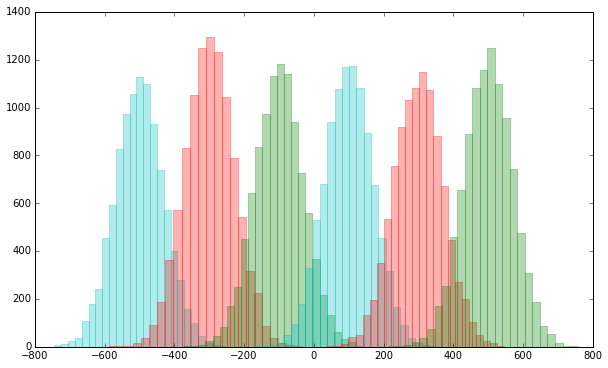

In [6]:
delta = 70
dn5 = NormalDistribution( -500, delta )
dn3 = NormalDistribution( -300, delta )
dn1 = NormalDistribution( -100, delta )
dp1 = NormalDistribution( 100, delta )
dp3 = NormalDistribution( 300, delta )
dp5 = NormalDistribution( 500, delta )

plt.figure( figsize=(10,6) )
dn5.plot( n=10000, edgecolor='c', facecolor='c', alpha=0.3, bins=25 )
dn3.plot( n=10000, edgecolor='r', facecolor='r', alpha=0.3, bins=25 )
dn1.plot( n=10000, edgecolor='g', facecolor='g', alpha=0.3, bins=25 )
dp1.plot( n=10000, edgecolor='c', facecolor='c', alpha=0.3, bins=25 )
dp3.plot( n=10000, edgecolor='r', facecolor='r', alpha=0.3, bins=25 )
dp5.plot( n=10000, edgecolor='g', facecolor='g', alpha=0.3, bins=25 )

In [7]:
sn5 = State(dn5, name="Negative 5" )
sn3 = State(dn3, name="Negative 3" )
sn1 = State(dn1, name="Negative 1" )
sp1 = State(dp1, name="Positive 1" )
sp3 = State(dp3, name="Positive 3" )
sp5 = State(dp5, name="Positive 5" )

states = [sn5, sn3, sn1, sp1, sp3, sp5]
model = HiddenMarkovModel("Stock Predictor")
model.add_states(states)

probability = 1.0/float(len(states))

for state in states:
    model.add_transition( model.start, state, probability )

    
for state1 in states:     
    for state2 in states:
        model.add_transition( state1, state2, probability )
model.bake()

In [ ]:
data = np.rint(data_flow * 100)
train_data = np.copy(data[:100])
model.train(map(int, list(train_data)))

[-14, 29, 75, -121, 277, 138, -292, -140, -14, -85, -14, -21, -122, -329, -260, -162, 147, 0, -152, 0, -45, 35, -208, 131, -521, 132, -144, -204, -131, -111, -81, 297, -96, 239, 117, 7, -344, -203, -66, 175, 310, 143, 82, 15, -169, 48, 65, -107, 10, -39, -475, -75, 433, -24, 180, 215, -422, 391, 189, -22, -2, -225, 531, 46, -133, 113, -222, 66, -260, 53, -150, 33, -112, -135, -242, -68, 32, -27, -15, 50, 26, -114, -21, -105, -31, -125, -55, 33, -110, -124, 18, -470, -82, -195, 242, 242, 94, -64, 85, -278]
